In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as sc
import seaborn as sbn

df = pd.read_csv('https://raw.githubusercontent.com/bertImaev/innopolis/main/attestation/a-1/Dataset/dataset_tk.csv')
print('Размер датасета: ', df.shape)
print('\nОснованая информация:')
df.info()

Размер датасета:  (503, 34)

Основаная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 

In [3]:
# Проверка на пропуски значений
print('Всего пропусков по датасету: ', df.isnull().sum().sum())
if df.isnull().sum().sum() != 0:
  print('Количество пропусков по столбцам:\n', df.isnull().sum())

Всего пропусков по датасету:  0


In [4]:
#Получим основные характеристики данных представленных в датасете
pd.set_option('display.max_columns', None)
df_stat = pd.DataFrame(df.describe())
print('Основные статистические характеристики:\n')
df_stat

Основные статистические характеристики:



,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,323.039563,208.283101,431.570179,11.093241,16.430616,176.151889,187.008549,204.106759,72.192445,300.738569,7.472962,83.159443,23.842545,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,38.499743,31.081610,42.252273,1.523179,4.582173,15.870266,29.665708,30.152708,6.887102,35.458236,1.132684,14.929589,1.961202,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,192.300000,131.800000,305.600000,6.200000,1.300000,130.600000,130.500000,121.000000,55.000000,195.700000,4.000000,43.500000,17.400000,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,302.700000,182.650000,401.700000,10.200000,17.400000,163.800000,165.300000,182.300000,67.000000,277.150000,6.950000,71.700000,22.800000,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,325.400000,209.300000,429.000000,11.400000,18.200000,174.500000,181.800000,205.300000,71.500000,302.200000,7.500000,78.300000,23.900000,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,344.900000,230.450000,463.750000,12.200000,18.600000,191.000000,210.800000,228.450000,76.500000,330.400000,8.300000,95.250000,25.000000,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,400.800000,272.300000,522.100000,14.000000,19.500000,205.100000,256.200000,273.300000,89.400000,365.400000,9.700000,121.400000,28.900000,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


Графическое отображение основынх статистических характеристик

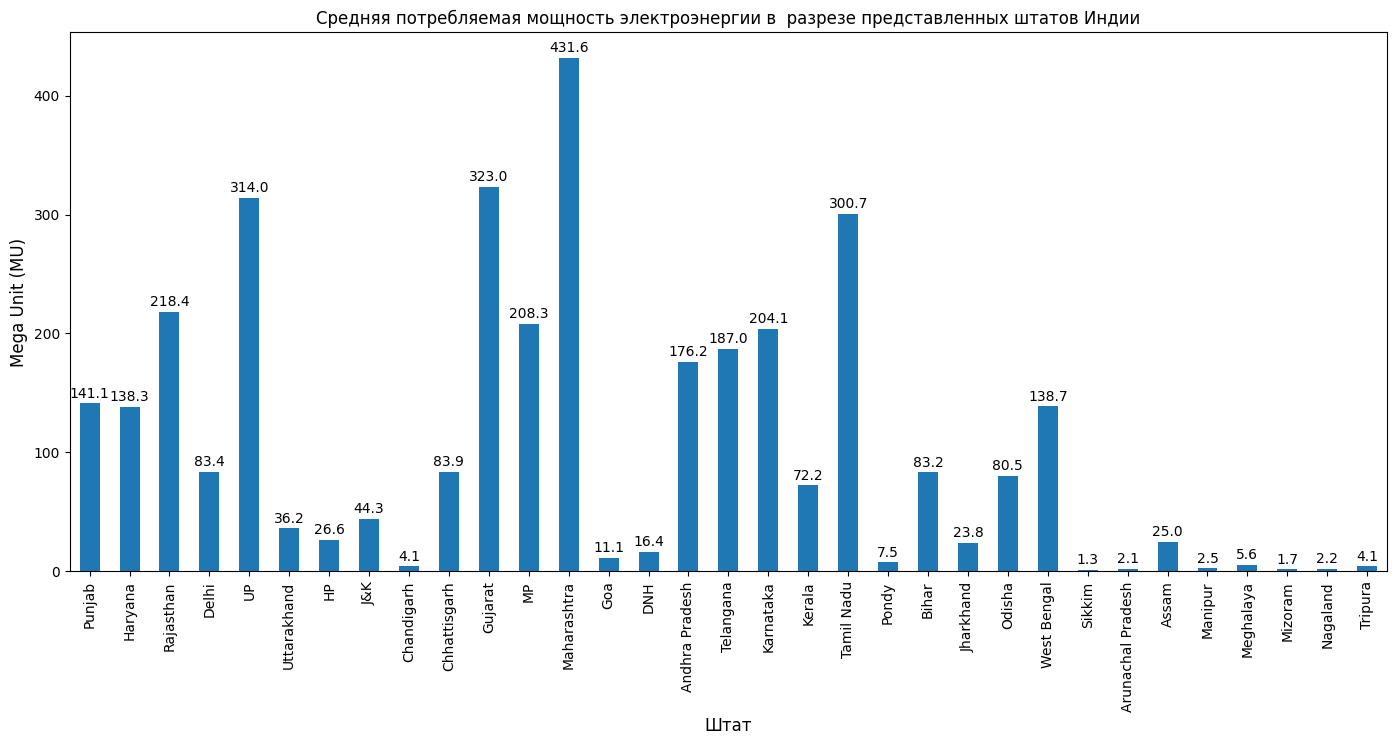

In [5]:
fig, fg1 = plt.subplots(1, 1, figsize=(17,7), dpi=100)
gf1 = df_stat.T
gf1['mean'].plot(kind='bar', fontsize=10,
                        title='Средняя потребляемая мощность электроэнергии в  разрезе представленных штатов Индии', ax=fg1)
fg1.set_ylabel('Mega Unit (MU)', fontsize=12)
fg1.set_xlabel('Штат', fontsize=12)
for i, val in enumerate(gf1['mean'].values):
    fg1.text(i, val+5, round(val, 1), horizontalalignment='center')
plt.show()

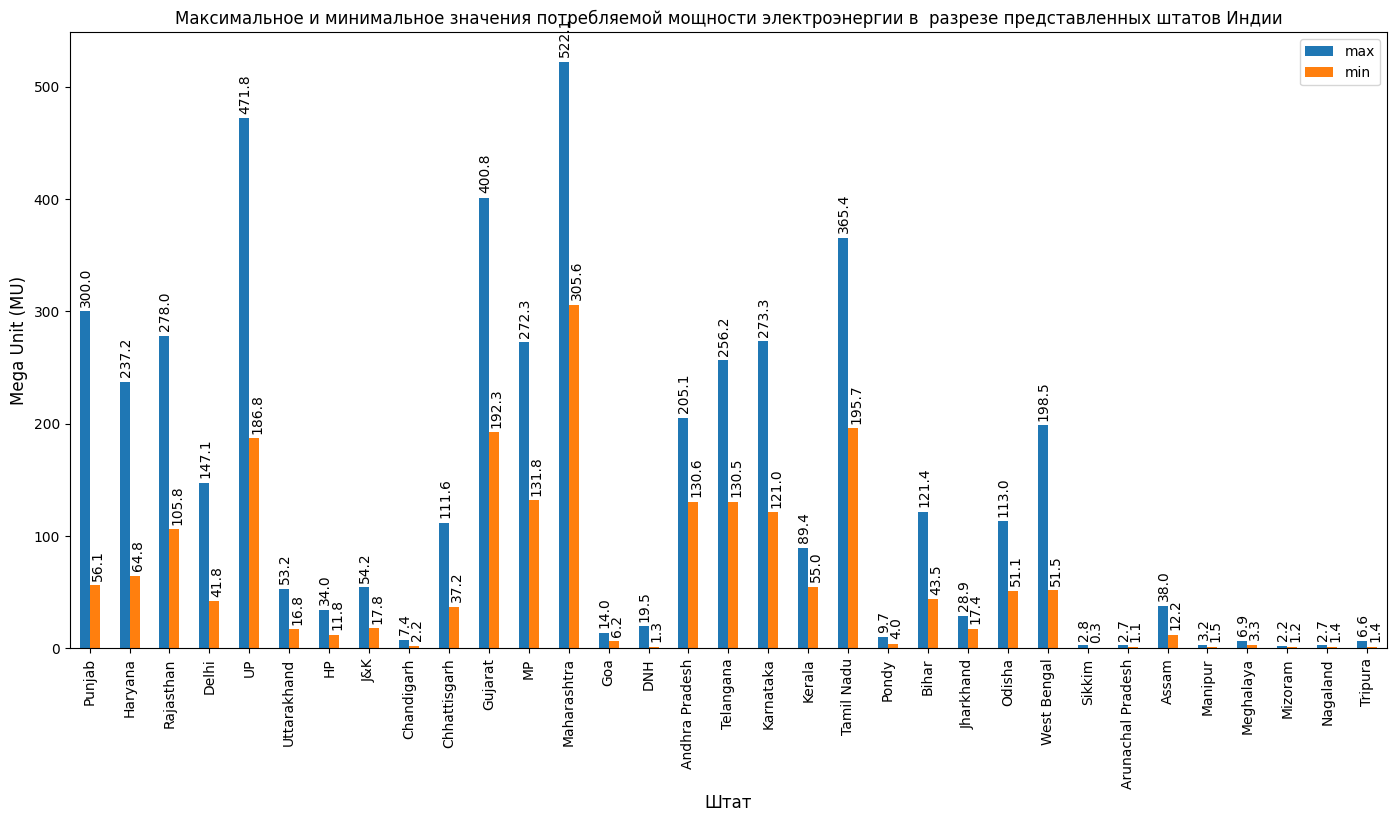

In [6]:
fig, fg1 = plt.subplots(1, 1, figsize=(17,8), dpi=100)
gf1 = df_stat.T
gf1[['max', 'min']].plot(kind='bar', fontsize=10,
                        title='Максимальное и минимальное значения потребляемой мощности электроэнергии в  разрезе представленных штатов Индии', ax=fg1)
fg1.set_ylabel('Mega Unit (MU)', fontsize=12)
fg1.set_xlabel('Штат', fontsize=12)
for i, val in enumerate(gf1[['max', 'min']].values):
  fg1.text(i-0.1, val[0]+7, round(val[0], 1), horizontalalignment='center', rotation=90)
  fg1.text(i+0.2, val[1]+7, round(val[1], 1), horizontalalignment='center', rotation=90)
plt.show()

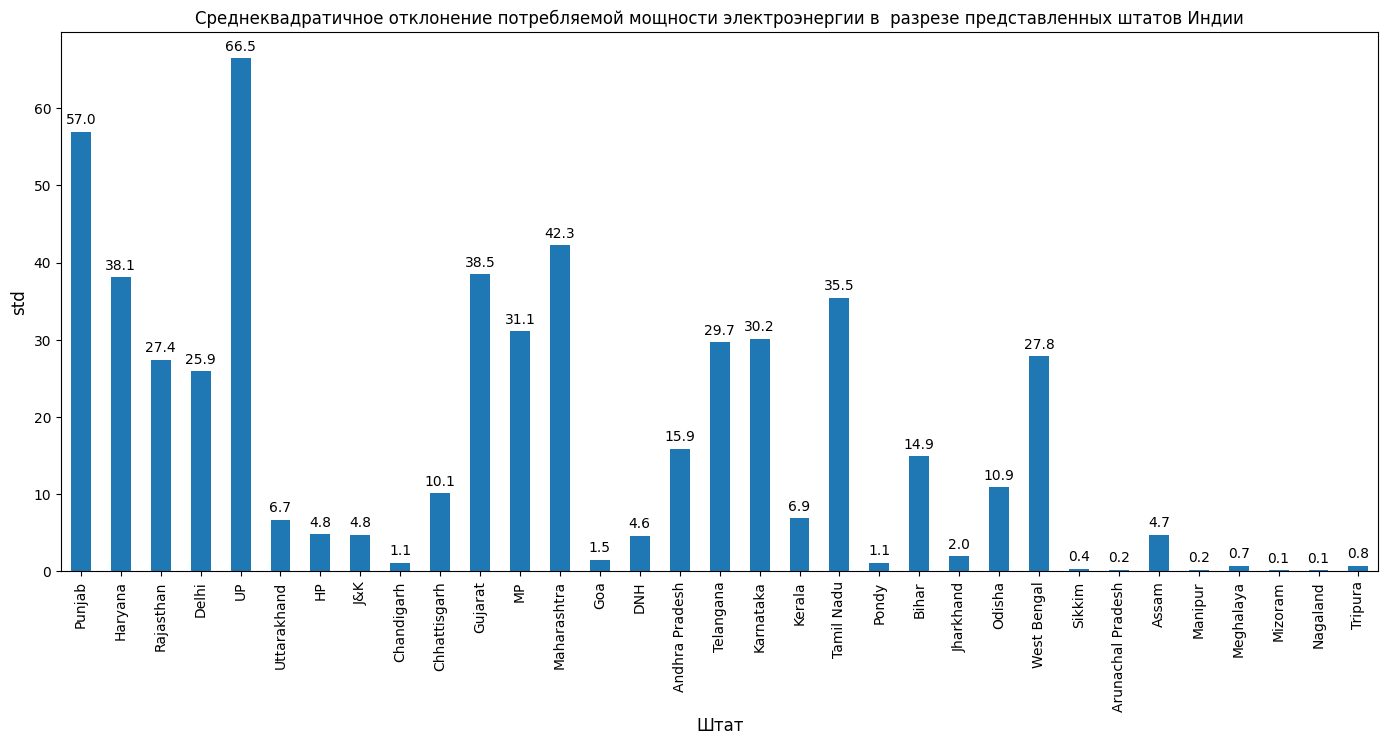

12 штатов имеют разброс значений более 25% выше среднего


In [7]:
fig, fg1 = plt.subplots(1, 1, figsize=(17,7), dpi=100)
gf1 = df_stat.T
gf1['std'].plot(kind='bar', fontsize=10,
                        title='Среднеквадратичное отклонение потребляемой мощности электроэнергии в  разрезе представленных штатов Индии', ax=fg1)
fg1.set_ylabel('std', fontsize=12)
fg1.set_xlabel('Штат', fontsize=12)
for i, val in enumerate(gf1['std'].values):
    fg1.text(i, val+1, round(val, 1), horizontalalignment='center')
plt.show()
print(len(gf1[gf1['std']>25]), 'штатов имеют разброс значений более 25% выше среднего')


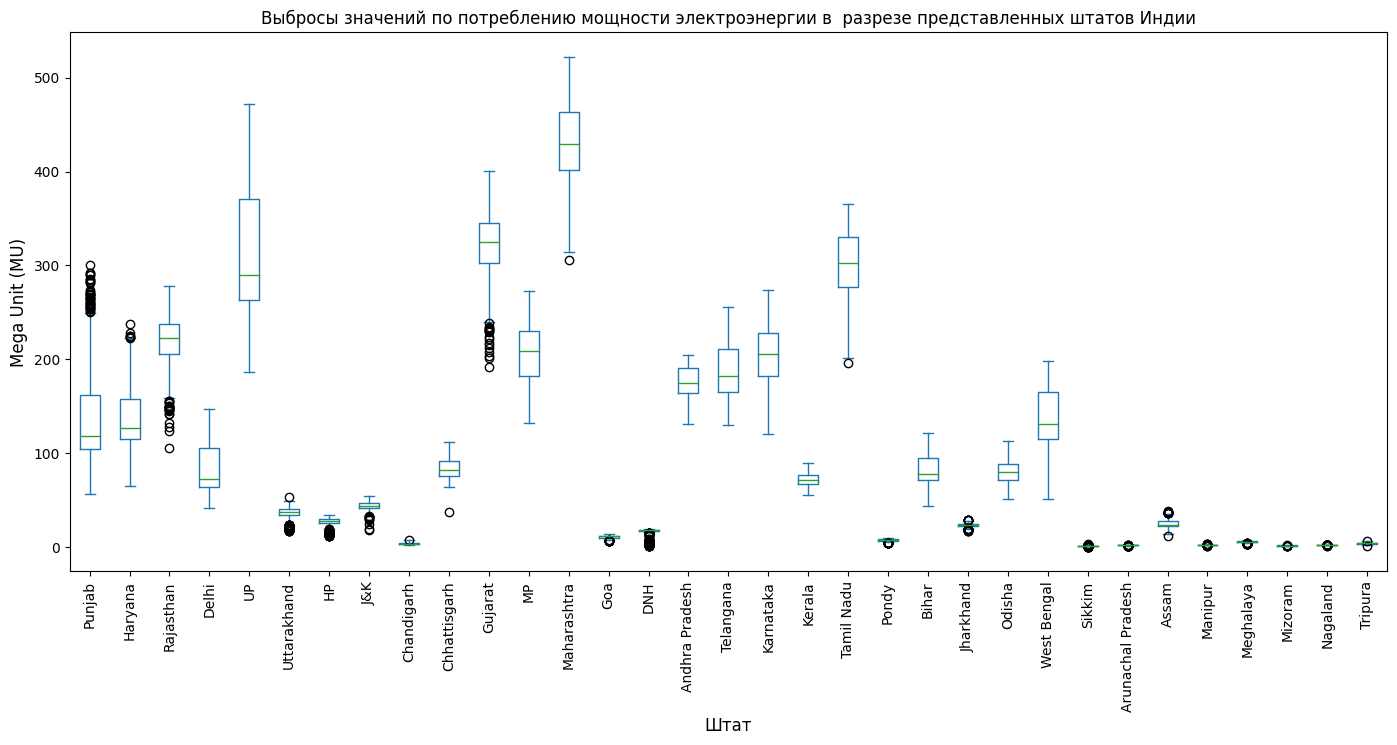

In [8]:
fig, fg1 = plt.subplots(1, 1, figsize=(17,7), dpi=100)
df.plot(kind='box', fontsize=10, title='Выбросы значений по потреблению мощности электроэнергии в  разрезе представленных штатов Индии',
           ax=fg1, rot=90)
fg1.set_ylabel('Mega Unit (MU)', fontsize=12)
fg1.set_xlabel('Штат', fontsize=12)
plt.show()

Оценка потребления электроэнергии по штатам

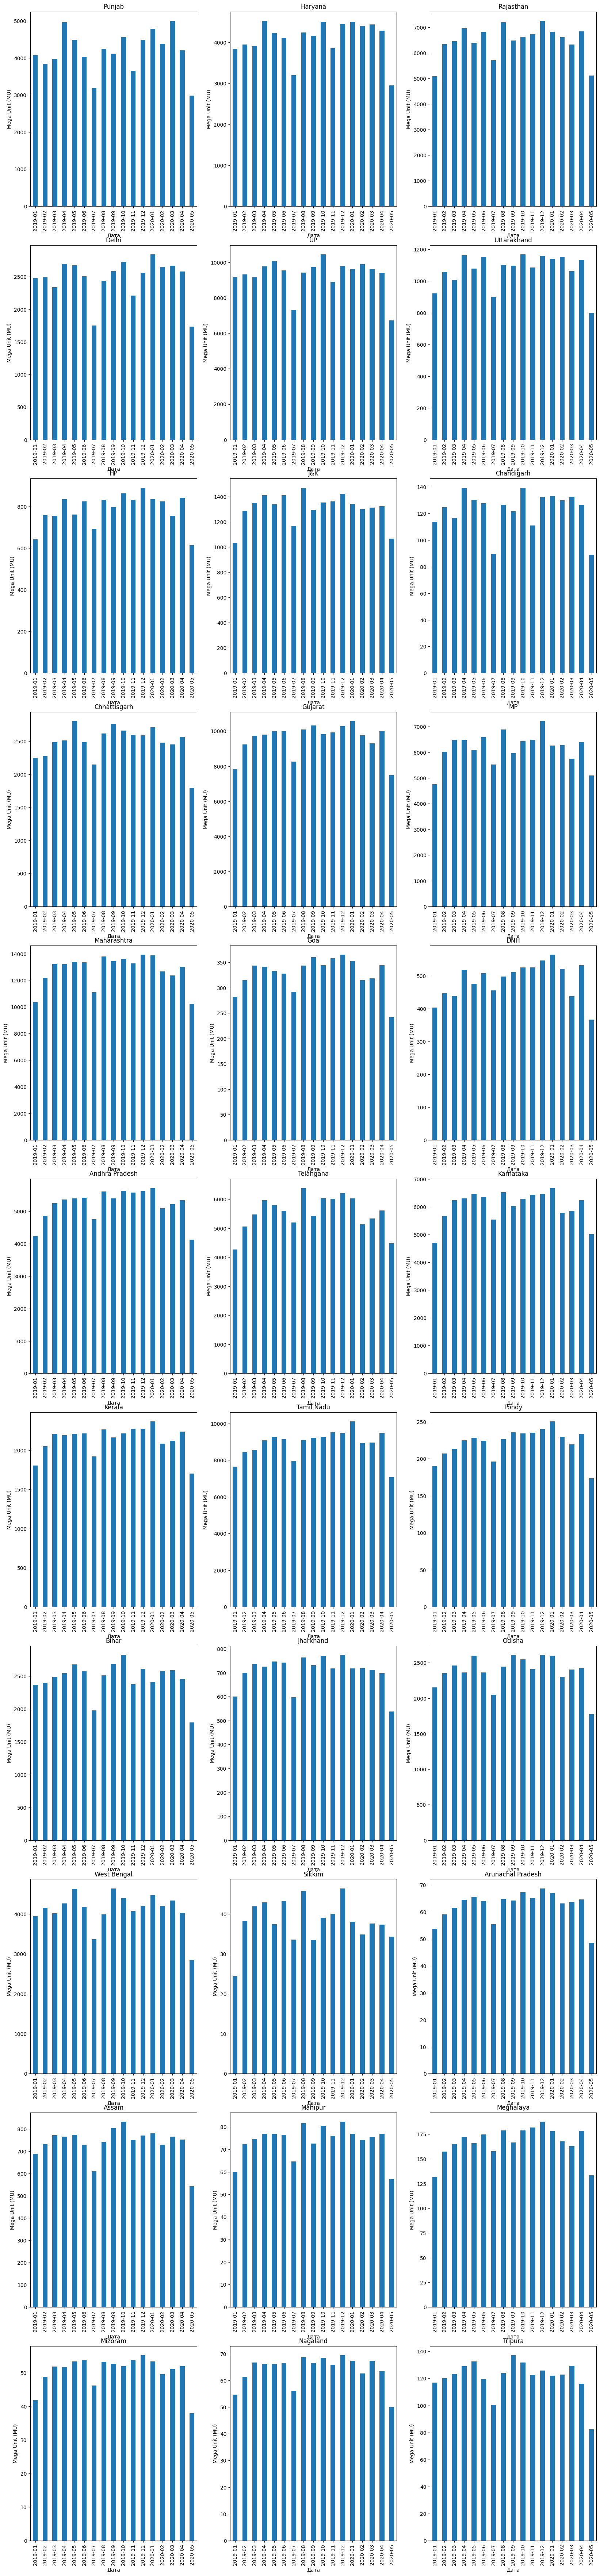

In [51]:
df =df.rename(columns={'Unnamed: 0': 'date'})
df['date'] = pd.to_datetime(df['date'])
fig, fg1 = plt.subplots(11, 3, figsize=(20, 90), dpi=100)
r = 0
c = 0
for i in list(df)[1:]:
  df_temp = df[i].groupby(df['date'].dt.to_period('M')).sum()
  df_temp.plot(kind='bar', ax=fg1[r, c], title = i)
  fg1[r, c].set_ylabel('Mega Unit (MU)')
  fg1[r, c].set_xlabel('Дата')
  c += 1
  if c == 3:
    r += 1
    c = 0
plt.show()

Визуальный анализ показывает следующую аномалию - резкое падение потребления электроэнергии в июле 2019 года. Скорее всего это связано с остановкой производства после начала пандемии COVID-2019 в марте-апреле 2019 года.